<a href="https://colab.research.google.com/github/Sundaraselvamp/Project/blob/main/Movie_Recommendation_System_with_Neural_Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the dependencies
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from tensorflow import keras
import zipfile


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# EXTRACTING THE FOLDERS FROM THE ZIP FILE
with zipfile.ZipFile('/content/drive/MyDrive/Movie recommender system.zip','r') as zip_file:
  zip_file.extractall('')

In [4]:
# lOADING THE CSV FILE WHICH CONSITS OF RATINGS GIVEN BY USER FOR A MOVIE AND MOVIE DATASET WHICH CONSISTS ON MOVIE NAME AND ID
rating = pd.read_csv("/content/rating.csv")
movie = pd.read_csv("/content/movie.csv")

In [5]:
print(rating.shape,movie.shape)


(20000263, 4) (27278, 3)


In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [7]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
rating = rating[0:110000]
movie = movie[0:110000]

In [9]:
# from the rating dataset will retrieve all the unique usersid

user_ids = rating['userId'].unique().tolist()
user2user = {x: i for i, x in enumerate(user_ids)}
userencodeduser = {i: x for i, x in enumerate(user_ids)}

In [10]:
print(user_ids)
print(user2user)
print(userencodeduser)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [11]:
rating.shape

(110000, 4)

In [12]:
# FROM THE RATING FILE WE WILL RETRIEVE ALL THE UNIQUE MOVIE ID AND USE ENUMERATE TO MAP EACH ID TO A KEY
movie_ids = rating['movieId'].unique().tolist()
movie2movie = {x: i for i, x in enumerate(movie_ids)}
movieencodemovie = {i: x for i, x in enumerate(movie_ids)}

In [13]:
rating['user'] = rating['userId'].map(user2user)
rating['movie'] = rating['movieId'].map(movie2movie)

In [14]:
rating.head()

,userId,movieId,rating,timestamp,user,movie
0,1,2,3.5,2005-04-02 23:53:47,0,0
1,1,29,3.5,2005-04-02 23:31:16,0,1
2,1,32,3.5,2005-04-02 23:33:39,0,2
3,1,47,3.5,2005-04-02 23:32:07,0,3
4,1,50,3.5,2005-04-02 23:29:40,0,4


In [15]:
# FINDING THE MINIMUM AND MAXIMUM RATING GIVEN BY A USER
min_rating = min(rating['rating'])
max_rating = max(rating['rating'])

In [16]:
num_users = len(user2user)
num_movies = len(movie2movie)
rating['rating'] = rating['rating'].values.astype(np.float32)

In [17]:
print("Number of users : {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(num_users,num_movies,min_rating,max_rating))

Number of users : 751, Number of Movies: 8864, Min rating: 0.5, Max rating: 5.0


In [18]:
# Train-Test Split
rating = rating.sample(frac = 1, random_state = 42) #randomly sample the dataset
x = rating[['user','movie']].values
# Normalize the target between 0 and 1
y = rating['rating'].apply(lambda x: (x - min_rating)/ (max_rating - min_rating)).values

In [19]:
# Assuming training on 90% of the data and validation on 10%
train_indicies = int(0.9 * rating.shape[0])

In [20]:
# Splitting our dataset into features and target variables
x_train,x_test,y_train,y_test = (x[:train_indicies],
                                 x[train_indicies:],
                                 y[:train_indicies],
                                 y[train_indicies:])

In [21]:
x_train.shape

(99000, 2)

In [22]:
y_train.shape

(99000,)

In [23]:
# Defining the model
embed_size = 50 #embedding size we need
user_input = layers.Input(shape = [1])
user_embed = layers.Embedding(num_users,embed_size,embeddings_initializer ="he_normal",embeddings_regularizer=keras.regularizers.l2(1e-6))(user_input)
# Emedding Layer will create 610 vectors look-up table of 50 dimension each
user_vect = layers.Flatten()(user_embed)

movie_input = layers.Input(shape = [1])
movie_embed = layers.Embedding(num_movies,embed_size,embeddings_initializer ="he_normal",embeddings_regularizer=keras.regularizers.l2(1e-6))(movie_input)
movie_vect = layers.Flatten()(movie_embed)

prod = layers.dot(inputs = [user_vect, movie_vect], axes = 1)

dense1 = layers.Dense(150,activation='relu', kernel_initializer="he_normal")(prod)
dense2 = layers.Dense(64,activation='relu', kernel_initializer="he_normal")(dense1)
dense3 = layers.Dense(1,activation='relu')(dense2)

In [24]:
# BUILDING OUR MODEL
model = Model([user_input, movie_input], dense3)

In [25]:
# COMPILING THE MODEL
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

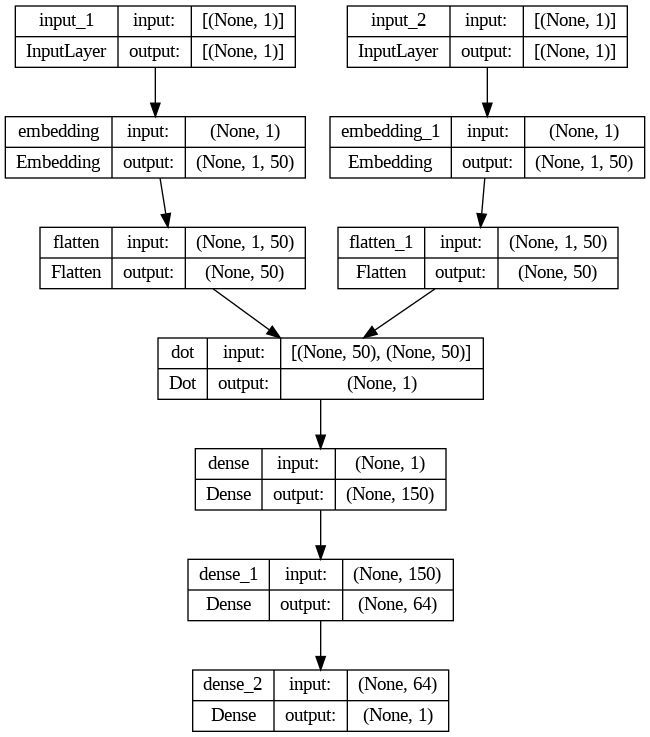

In [26]:
keras.utils.plot_model(model,show_shapes = True)

In [27]:
#TRAINING OUR MODEL

In [28]:
%%time
history = model.fit([x_train[:,0],x_train[:,1]], y_train, batch_size = 32, epochs = 10, verbose = 1) # here we will be sending user_id and movie_id as inputs

Epoch 1/10
3094/3094 [==============================] - 38s 12ms/step - loss: 0.0598
Epoch 2/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0506
Epoch 3/10
3094/3094 [==============================] - 32s 10ms/step - loss: 0.0399
Epoch 4/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0348
Epoch 5/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0297
Epoch 6/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0272
Epoch 7/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0250
Epoch 8/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0237
Epoch 9/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0225
Epoch 10/10
3094/3094 [==============================] - 33s 11ms/step - loss: 0.0214
CPU times: user 6min 50s, sys: 32.3 s, total: 7min 23s
Wall time: 5min 32s


In [29]:
prediction = model.evaluate([x_test[:,0],x_test[:,1]])

344/344 [==============================] - 1s 3ms/step - loss: 0.0036


In [30]:
pred = model.predict([x_train[4:5,0],x_train[4:5,1]])
pred

1/1 [==============================] - 0s 204ms/step


array([[0.8702461]], dtype=float32)

In [31]:
movie.shape

(27278, 3)

In [32]:
# getting 1 random user id and recommending that user top 10 movies based on that user ratings and the movies watched by him

In [33]:
user_id = rating.userId.sample(1).iloc[0]  # getting 1 random user id
movies_watched_by_user = rating[rating.userId == user_id] #filtering out the movies watched by user
movies_not_watched = movie[~movie["movieId"].isin(movies_watched_by_user.movieId.values)]["movieId"] #getting the movies which are not watched by the user

In [34]:
user_id # here the userId is 387

726

In [35]:
movies_watched_by_user.head()

,userId,movieId,rating,timestamp,user,movie
103848,726,318,5.0,1996-09-10 15:52:42,725,12
103843,726,246,5.0,1996-09-10 16:01:38,725,1188
103867,726,589,4.0,1996-09-10 15:56:29,725,16
103863,726,539,5.0,1996-09-10 15:58:25,725,444
103856,726,410,3.0,1996-09-10 15:56:54,725,696


In [36]:
movies_not_watched

0             1
1             2
2             3
3             4
4             5
          ...  
27273    131254
27274    131256
27275    131258
27276    131260
27277    131262
Name: movieId, Length: 27241, dtype: int64

In [37]:
#this is an innerjoin between movies_not_watched and movie ids from rating table (to check whether the movie ids are not out of place)
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie.keys()))
)

In [38]:
movies_not_watched

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 65567,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 65585,
 50,
 49,
 52,
 51,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 32853,
 92,
 93,
 94,
 95,
 96,
 97,
 65631,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 65642,
 109,
 111,
 112,
 113,
 114,
 32882,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 129,
 130,
 131,
 132,
 32898,
 134,
 135,
 136,
 139,
 140,
 141,
 145,
 65682,
 147,
 146,
 149,
 148,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 32954,
 193,
 194,
 195

In [39]:
max(movies_not_watched)

128594

In [40]:
movies_not_watched_index = [[movie2movie.get(x)] for x in movies_not_watched] # get the indexes of the movies not watched by the user which we will use later for recommending
movies_not_watched_index

[[227],
 [0],
 [175],
 [1994],
 [1044],
 [364],
 [420],
 [1965],
 [1677],
 [365],
 [386],
 [2614],
 [4834],
 [1187],
 [429],
 [430],
 [387],
 [1469],
 [366],
 [1678],
 [630],
 [1646],
 [1679],
 [228],
 [3537],
 [3816],
 [2021],
 [1],
 [3163],
 [1647],
 [2],
 [3836],
 [1045],
 [3809],
 [7844],
 [3553],
 [631],
 [3538],
 [2123],
 [1680],
 [2074],
 [1681],
 [1867],
 [1682],
 [3],
 [632],
 [3947],
 [4],
 [7031],
 [421],
 [8381],
 [4837],
 [1311],
 [8382],
 [1683],
 [1868],
 [3164],
 [388],
 [1312],
 [176],
 [2615],
 [2050],
 [688],
 [3505],
 [1313],
 [1884],
 [1396],
 [177],
 [4838],
 [4149],
 [1470],
 [1314],
 [3554],
 [1315],
 [4977],
 [2124],
 [1316],
 [5579],
 [2616],
 [3165],
 [3166],
 [3167],
 [1995],
 [1317],
 [3555],
 [1318],
 [1471],
 [3902],
 [8293],
 [1319],
 [1684],
 [2075],
 [1047],
 [3533],
 [2723],
 [8359],
 [3539],
 [1320],
 [1321],
 [2051],
 [5580],
 [389],
 [431],
 [2988],
 [1885],
 [6480],
 [8383],
 [1332],
 [5],
 [4180],
 [2125],
 [6079],
 [3540],
 [4115],
 [3534],
 [31

In [41]:
user_encoder = userencodeduser.get(user_id)
user_encoder

727

In [42]:
# Stacking the userid with respect to the movie not watched by the user
user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watched), movies_not_watched_index))
user_movie_array

array([[ 727,  227],
       [ 727,    0],
       [ 727,  175],
       ...,
       [ 727, 1027],
       [ 727, 5391],
       [ 727, 6532]])

In [43]:
# we will do the prediction of the user 387 and predicting the rating which the user may give based on his previous history of rating
ratings = model.predict([user_movie_array[:,0],user_movie_array[:,1]]).flatten()
ratings

276/276 [==============================] - 1s 2ms/step


array([0.9881749 , 0.5840564 , 0.3461241 , ..., 0.57181793, 0.3427571 ,
       0.34418255], dtype=float32)

In [44]:
top_ratings_indices = ratings.argsort()[-10:][::-1] #indices of highest 10 ratings


In [45]:
# getting the id of movies which our model has predicted for the particular user
recommended_movie_ids = [movieencodemovie.get(movies_not_watched_index[x][0]) for x in top_ratings_indices]

In [46]:
print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie[movie["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

Showing recommendations for user: 726
Movies with high ratings from user
--------------------------------
Hoop Dreams (1994) : Documentary
Shawshank Redemption, The (1994) : Crime|Drama
Fugitive, The (1993) : Thriller
Schindler's List (1993) : Drama|War
Searching for Bobby Fischer (1993) : Drama


In [47]:
print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie[movie["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

--------------------------------
Top 10 movie recommendations
--------------------------------
Toy Story (1995) : Adventure|Animation|Children|Comedy|Fantasy
Pulp Fiction (1994) : Comedy|Crime|Drama|Thriller
Independence Day (a.k.a. ID4) (1996) : Action|Adventure|Sci-Fi|Thriller
Wizard of Oz, The (1939) : Adventure|Children|Fantasy|Musical
One Flew Over the Cuckoo's Nest (1975) : Drama
Godfather: Part II, The (1974) : Crime|Drama
Hunt for Red October, The (1990) : Action|Adventure|Thriller
Shakespeare in Love (1998) : Comedy|Drama|Romance
Matchstick Men (2003) : Comedy|Crime|Drama
Up (2009) : Adventure|Animation|Children|Drama
